# Sobre o notebook

A "hora da prática" é uma atividade do curso de Data Visualization: gráficos de comparação e distribuição da Alura para a escrita e teste dos códigos dos diversos desafios envolvendo os aprendizados de cada aula.

O notebook "hora da prática" é um notebook construído com espaço para as células dos desafios propostos no curso, com ele você tem espaço para construir e executar suas soluções


## Paleta de Cores

Vamos compartilhar aqui a paleta de cores que usamos durante o curso pra você executar e usar em seu projeto, mas sinta-se livre para construir a sua propria.

In [2]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from warnings import filterwarnings
import plotly.express as px

In [4]:
filterwarnings('ignore')

## Aula 01 - Comparando dados

### Desafio 1

#### Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

In [5]:
vendas = pd.read_csv(
    r"https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")

In [6]:
vendas.head(1)

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.7,445.33,0.0,445.33,2,890.66,71.26


In [7]:
vendas[['data_pedido', 'data_envio']] = vendas[['data_pedido', 'data_envio']].astype('datetime64[ns]')

In [8]:
# vendas.info()

In [9]:
# Variáveis de interesse: Ano, Lucro

vendas_ano = vendas.copy(deep=True)
vendas_ano['ano'] = vendas_ano['data_pedido'].dt.year
vendas_final = vendas_ano.copy(deep=True)
vendas_final = vendas_final[['lucro', 'ano']]

In [10]:
vendas_final_agrupado = vendas_final.groupby(by='ano').agg('sum')
vendas_final_agrupado = vendas_final_agrupado.reset_index()

In [11]:
vendas_final_agrupado

,ano,lucro
0,2016,75033.63
1,2017,101265.15
2,2018,129862.44
3,2019,148097.30


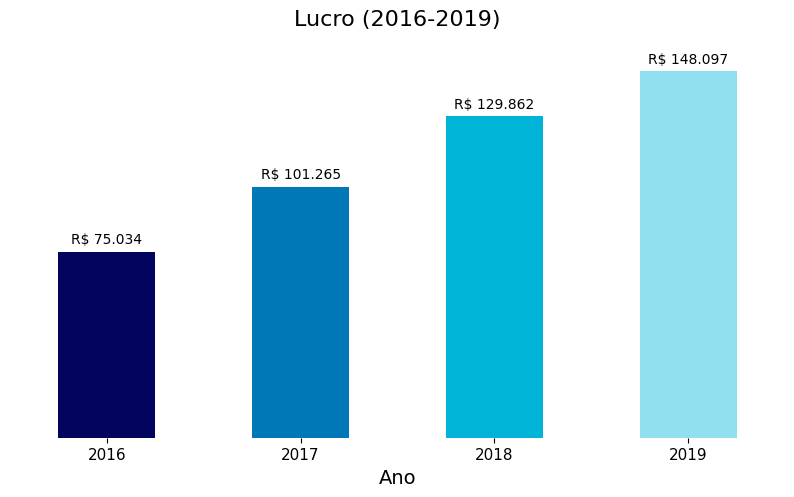

In [12]:
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

fig, ax = plt.subplots(figsize=(10, 5))

vendas_final_agrupado.plot(
    kind='bar', x='ano', y='lucro', ax=ax, legend=False, color=cores
)

ax.set_title('Lucro (2016-2019)', fontsize=16, y=1.05)
ax.tick_params(axis='x', rotation=0, labelsize=11)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_frame_on(False)

for pos, valor in enumerate(vendas_final_agrupado['lucro']):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')
    offset = 5e3
    ax.text(pos, valor + offset, qtd, ha='center', va='center')


plt.xlabel('Ano', fontsize=14)
plt.show()

### Desafio 2

#### Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

In [13]:
# Variáveis de interesse: vendas, tipo do produto

faturamento = vendas.copy(deep=True)
faturamento['ano'] = faturamento['data_pedido'].dt.year
faturamento = faturamento[['vendas', 'tipo_produto']]

In [14]:
faturamento_agrupado = faturamento.groupby(by='tipo_produto').agg('sum')

faturamento_top_10 = faturamento_agrupado.sort_values(by='vendas',
                                                      ascending=False).head(10)

In [15]:
faturamento_top_10.reset_index()

,tipo_produto,vendas
0,pneus,1022428.97
1,ferramentas,995158.41
2,vasos,696044.18
3,ferramentas de jardinagem,648879.72
4,materiais de revestimento,629656.36
5,equipamentos de limpeza,542304.58
6,ferramentas automotivas,502109.29
7,peças de reposição,486907.94
8,encanamentos,373223.88
9,mobiliário de exterior,328932.27


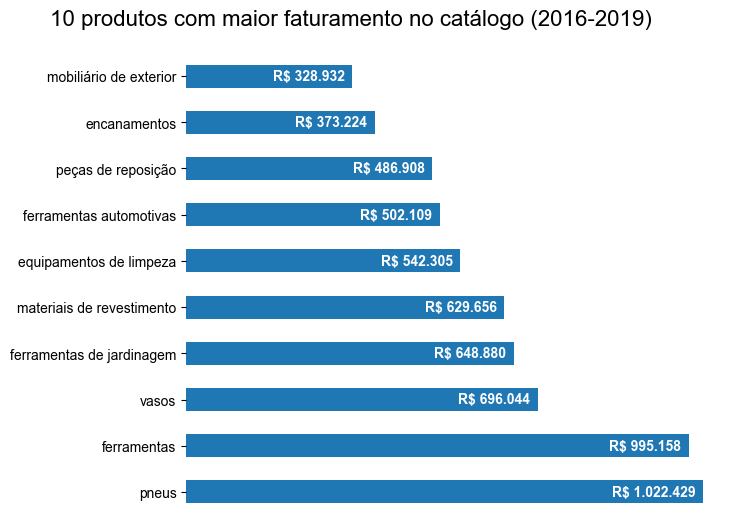

In [16]:
fig, ax = plt.subplots(figsize=(7, 6))

faturamento_top_10.plot(kind='barh', ax=ax, legend=False)

sns.set_theme(style='darkgrid')

ax.set_frame_on(False)

plt.ylabel('')
plt.xticks([])

for i, valor in enumerate(faturamento_top_10['vendas']):
        qtd = f'R$ {valor:,.0f}'.replace(',', '.')
        offset = 1.5e4 # offset de 1000
        ax.text(x=valor - offset, y=i, s=qtd, color='white', fontsize=10,
                fontweight='bold', ha='right', va='center')

plt.title('10 produtos com maior faturamento no catálogo (2016-2019)', loc='left',
          fontsize=16, x=-0.25, pad=20)

plt.show()

## Aula 02 - Agrupando dados

### Desafio 1

#### Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

In [17]:
# Variáveis de interesse: vendas, departamento, região['Centro-Oeste'], ano[['2017', '2018']]

# Criando uma cópia profunda dos dados originais

vendas_centro_oeste = vendas.copy(deep=True)

# Separando apenas a região centro-oeste

vendas_centro_oeste = vendas_centro_oeste.query(
    "regiao == 'Centro-Oeste'"
)

# Pegando as variáveis de interesse

vendas_centro_oeste = vendas_centro_oeste[['data_pedido',
                                           'departamento',
                                           'vendas']]

# Criando a coluna de ano

vendas_centro_oeste['ano'] = vendas_centro_oeste['data_pedido'].dt.year

# Removendo a coluna de data completa

vendas_centro_oeste = vendas_centro_oeste.drop(columns='data_pedido')

# Seleção apenas dos anos necessários

centro_oeste_final = vendas_centro_oeste[
    (vendas_centro_oeste['ano'] == 2017) | (vendas_centro_oeste['ano'] == 2018)
]

# Agrupamento por ano e departamento

centro_oeste_final = centro_oeste_final.groupby(by=['ano', 'departamento']).agg('sum')

In [18]:
centro_oeste_pivot = centro_oeste_final.reset_index().pivot(index='ano',
                                              columns='departamento',
                                              values='vendas')

In [19]:
centro_oeste_pivot

departamento,Automotivo,Jardinagem e paisagismo,Materiais de construção
ano,,,
2017,51100.96,39201.96,58912.08
2018,86540.18,52617.42,68911.11


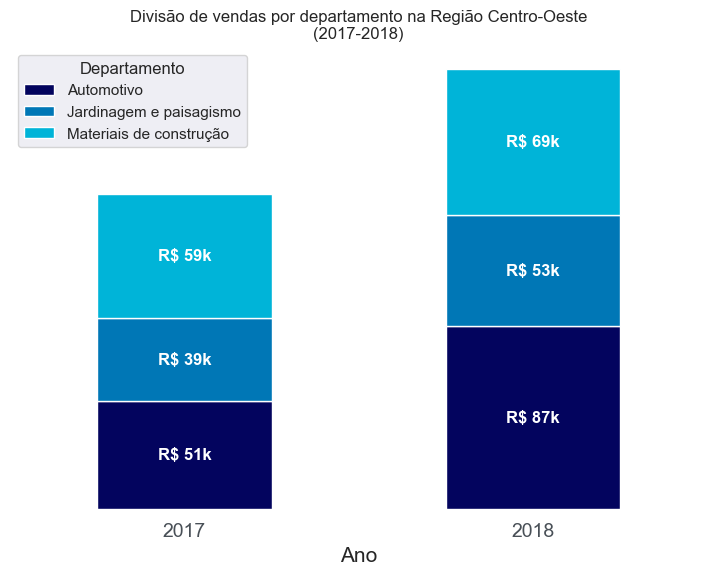

In [20]:
fig, ax = plt.subplots(figsize=(9, 6))


centro_oeste_pivot.plot(kind='bar', stacked=True, ax=ax, color=cores)
ax.tick_params(axis='x', rotation=0, labelsize=12)

ax.legend(title='Departamento')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor=CINZA2, rotation=0)
ax.set_frame_on(False)

plt.xlabel('Ano', fontsize=15)

for container in ax.containers:
        labels = [
            f'R$ {valor.get_height()/1000:,.0f}k'.replace(',', '.') for valor in container
        ]
        ax.bar_label(container, label_type='center', labels=labels,
                     color='#fff', fontweight='bold')

plt.title('Divisão de vendas por departamento na Região Centro-Oeste\n(2017-2018)')

plt.show()

### Desafio 2

#### Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

In [21]:
# Variáveis de interesse: modo de envio, departamento

modo_envio = vendas.copy(deep=True)
modo_envio = modo_envio[['departamento', 'modo_envio']]

df_envio_normalizado = pd.crosstab(index=modo_envio['departamento'],
                           columns=modo_envio['modo_envio'],
                           normalize='index')

In [22]:
df_envio_normalizado

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


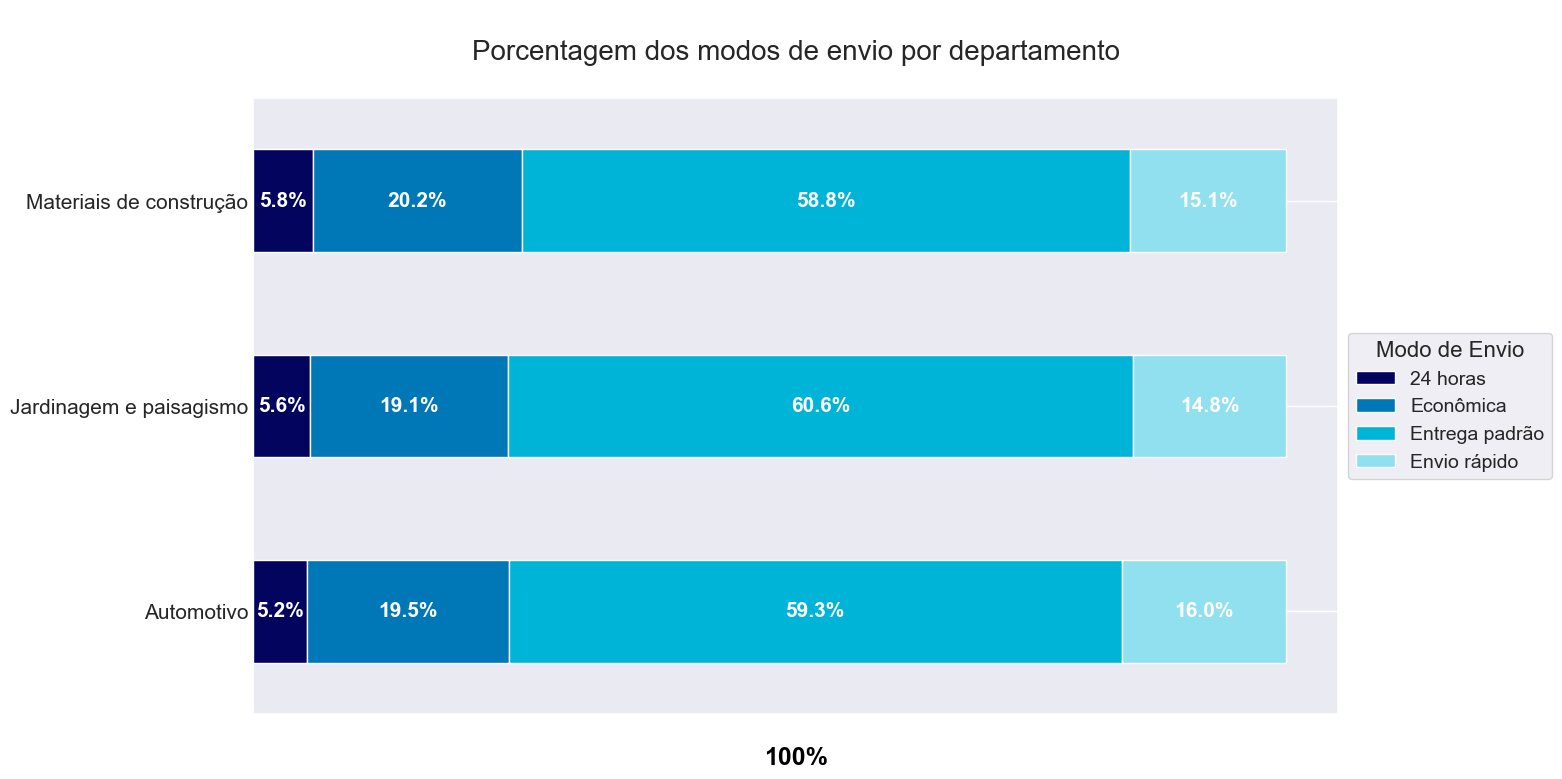

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))

df_envio_normalizado.plot(kind='barh', stacked=True, color=cores, ax=ax)

ax.set_xlabel('\n100%', color='black', fontsize=18, loc='center', fontweight='bold')
ax.set_ylabel('', fontsize=18)
ax.tick_params(axis='both', which='both', length=0)
ax.legend(loc='center left',
          bbox_to_anchor=(1, 0.5),
          title='Modo de Envio',
          fontsize=14, title_fontsize=16) 

plt.title('\nPorcentagem dos modos de envio por departamento\n', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks([])

for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels=labels, fontsize=15, color='white', fontweight='bold')

plt.show()

## Aula 03 - Séries de tempo

### Desafio 1

#### Como estão as vendas por semestre no estado em que você mora ou que deseja conhecer? Destaque os valores máximos e mínimos de venda para apresentá-los ao seu público.

In [24]:
# Variáveis de interesse: Estado, Vendas, Tempo.

df_sp = vendas.copy(deep=True)
df_sp = df_sp[['data_pedido', 'vendas', 'estado']]
df_sp = df_sp.query("estado == 'São Paulo'")[['data_pedido', 'vendas']]
df_sp['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format=r'%Y-%m-%d')
df_sp = df_sp.set_index('data_pedido')
df_sp = df_sp.resample('6MS').agg('sum')

In [25]:
df_sp

,vendas
data_pedido,
2016-01-01,85659.21
2016-07-01,299731.77
2017-01-01,112995.00
2017-07-01,327701.31
2018-01-01,153899.35
2018-07-01,397168.69
2019-01-01,150177.61
2019-07-01,483585.08


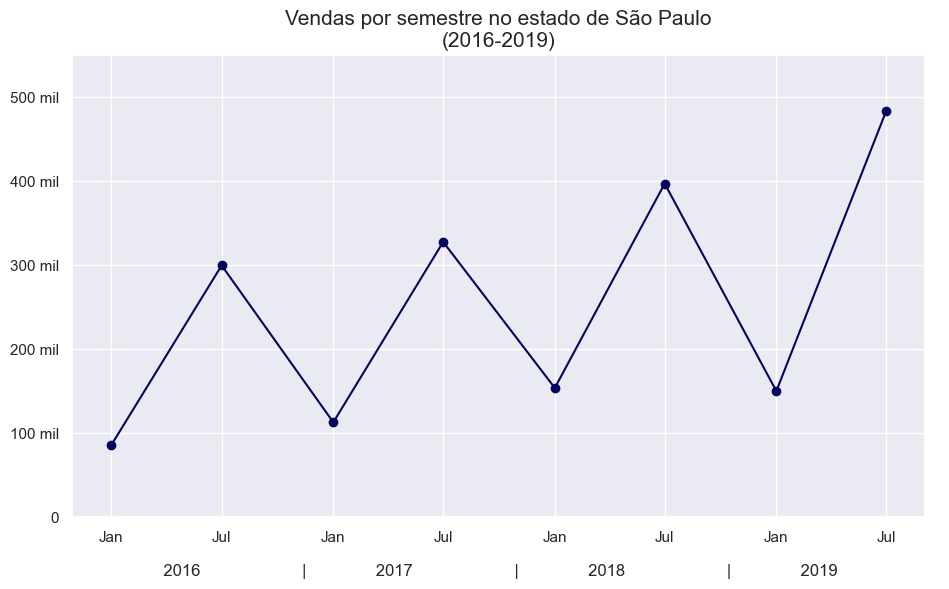

In [26]:
fig, ax = plt.subplots(figsize=(11, 6))

ax.plot(df_sp.index,
        df_sp['vendas'],
        color=AZUL1,
        marker='o',
        markersize=6)

ax.set_title('Vendas por semestre no estado de São Paulo\n(2016-2019)',
             fontsize=15)

texto = [15 * ' ' + str(i) + 22 * ' ' for i in range(2016, 2020)]
ax.text(ax.get_xbound()[0] + 35, -7e4, f'{texto[0]}|{texto[1]}|{texto[2]}|{texto[3]}')

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(['Jan', 'Jul',
                    'Jan', 'Jul',
                    'Jan', 'Jul',
                    'Jan', 'Jul',])

ax.set_yticklabels(['0', '100 mil',
                    '200 mil', '300 mil',
                    '400 mil', '500 mil'])


plt.ylim(0, 5.5e5)


plt.show()

### Desafio 2

#### Compare os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

In [27]:
# Variáveis de interesse: Lucro, Estados, Região, Tempo

lucro_nordeste = vendas.copy(deep=True)
lucro_nordeste = lucro_nordeste[['lucro', 'data_pedido',
                                 'estado', 'regiao']]
lucro_nordeste = lucro_nordeste.query("regiao == 'Nordeste'")
lucro_nordeste = lucro_nordeste.drop(columns='regiao')
lucro_nordeste = pd.crosstab(index=lucro_nordeste['data_pedido'],
                             columns=lucro_nordeste['estado'],
                             values=lucro_nordeste['lucro'],
                             aggfunc='sum')
lucro_nordeste = lucro_nordeste[['Ceará', 'Bahia', 'Pernambuco',
                                 'Maranhão', 'Alagoas', 'Piauí',
                                 'Rio Grande do Norte', 'Sergipe',
                                 'Paraíba']]
lucro_nordeste = lucro_nordeste.resample('Y').agg('sum')
lucro_nordeste = round(lucro_nordeste / 1e3, 2)
lucro_nordeste

estado,Ceará,Bahia,Pernambuco,Maranhão,Alagoas,Piauí,Rio Grande do Norte,Sergipe,Paraíba
data_pedido,,,,,,,,,
2016-12-31,10.25,9.98,11.73,1.88,1.20,0.02,0.27,0.89,-0.27
2017-12-31,9.88,6.89,4.24,1.60,3.77,1.43,0.65,0.98,-2.20
2018-12-31,6.40,8.59,9.18,2.69,3.13,5.43,1.44,0.55,0.15
2019-12-31,30.26,14.09,6.98,5.07,1.45,1.34,2.09,1.95,1.60


In [28]:
fig = px.line(lucro_nordeste, x=lucro_nordeste.index, y=lucro_nordeste.columns, markers = True, labels={"estado": "Estados"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3, AZUL5, LARANJA1, CINZA1, AZUL4])

fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Lucros das lojas de departamentos por ano na Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals=lucro_nordeste.index)

fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}")

fig.show()

## Aula 04 - Distribuindo dados

### Desafio 1

In [42]:
idades = pd.read_csv(
    r'C:\Estudos\alura\data-science\10-dataviz\dados\pop_idade.csv'
)

vol_amaciante = pd.read_csv(
    r'C:\Estudos\alura\data-science\10-dataviz\dados\volume_amaciante.csv'
)

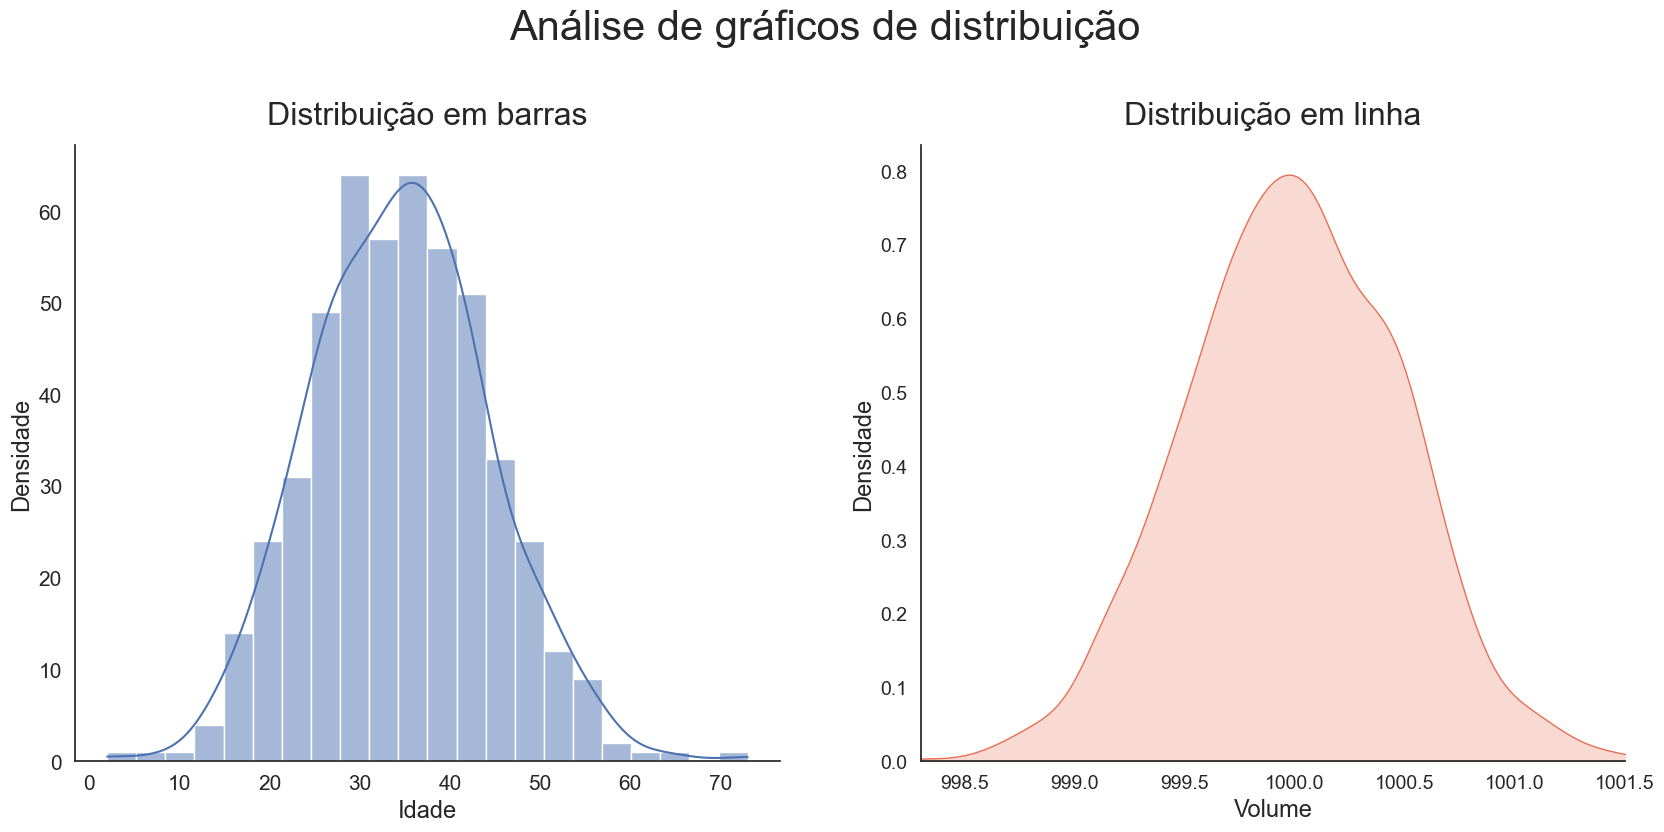

In [91]:
sns.set_theme(style='white')
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

plt.suptitle(t='Análise de gráficos de distribuição', fontsize=30,
             y=1.05)

sns.histplot(data=idades, ax=axs[0], x='idade', kde=True)
axs[0].set_title('Distribuição em barras', fontsize=23, y=1.02)
axs[0].set_xlabel('Idade', fontsize=17)
axs[0].set_ylabel('Densidade', fontsize=17)
axs[0].xaxis.set_tick_params(labelsize=15, color=CINZA2)
axs[0].yaxis.set_tick_params(labelsize=15, color=CINZA2)


sns.kdeplot(data=vol_amaciante, ax=axs[1], x='Volume', color=VERMELHO1, fill=True)
axs[1].set_title('Distribuição em linha', fontsize=23, y=1.02)
axs[1].set_xlabel('Volume', fontsize=17)
axs[1].set_ylabel('Densidade', fontsize=17)
axs[1].xaxis.set_tick_params(labelsize=14, color=CINZA2)
axs[1].yaxis.set_tick_params(labelsize=14, color=CINZA2)
axs[1].set_xlim(vol_amaciante['Volume'].min(), vol_amaciante['Volume'].max())


sns.despine()
plt.show()